# Variations in Ford GoBike Trip Durations by Various Metrics
## by Deepanshu Sharma

## Investigation Overview

> In this investigation, I wanted to find out how the duration of a bike trip was affected by various variables like the user type(Customer or Subscriber), gender, customer age, month, day of the week and hour of the day.

## Dataset Overview

> The dataset consisted of information about 519,700 trips taken during the year 2017. Data was available for the months of June to December. In addition to the above variables, the dataset also contained information regarding start and end stations, their locations, and the bike id

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
# load in the dataset into a pandas dataframe
df = pd.read_csv('2017-fordgobike-tripdata.csv')

Calculate appoximate age of members from birth year

In [3]:
df['approx_age'] = 2019-df['member_birth_year']

In [4]:
#Convert start_time and end_time to datetime dtypes
df['start_time'] = pd.to_datetime(df['start_time'], infer_datetime_format=True)
df['end_time'] = pd.to_datetime(df['end_time'], infer_datetime_format=True)

In [5]:
#Extract month, day of the week and hour from start time
df['start_month'] = df['start_time'].dt.month
df['start_day'] = df['start_time'].dt.dayofweek
df['start_hour'] = df['start_time'].dt.hour

In [7]:
# convert start_month into categorical dtype
month_dict = {6: 'June', 7: 'July', 8: 'Aug', 9: 'Sep', 10: 'Oct', 11: 'Nov', 12: 'Dec'}
df['start_month'] = df['start_month'].apply(lambda x: month_dict[x])
month_type = pd.api.types.CategoricalDtype(ordered=True, categories=['June', 'July', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
df['start_month'] = df['start_month'].astype(month_type)

In [8]:
# Convert start_day into a categorical dtype
day_dict = {0: 'Mon', 1: 'Tue', 2: 'Wed', 3: 'Thurs', 4: 'Fri', 5: 'Sat', 6: 'Sun'}
df['start_day'] = df['start_day'].apply(lambda x: day_dict[x])
day_type = pd.api.types.CategoricalDtype(ordered=True, categories=['Mon', 'Tue', 'Wed', 'Thurs', 'Fri', 'Sat', 'Sun'])
df['start_day'] = df['start_day'].astype(day_type)

In [9]:
# Convert start_hour into categorical dtype
hours = [i for i in range(0, 24)]
hour = pd.api.types.CategoricalDtype(ordered=True, categories=hours)
df['start_hour'] = df['start_hour'].astype(hour)

## Distribution of Trip Durations

> We had to apply log transormation on the trip duration variable as we had a very large range of values. We observe that we have a unimodal distribution with mode at about 500 sec

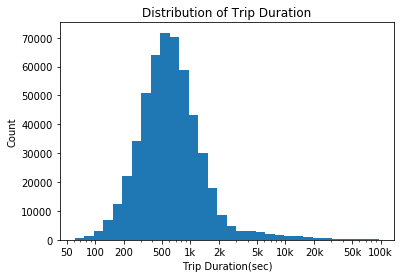

In [6]:
bins = 10**(np.arange(np.log10(df['duration_sec'].min()), np.log10(df['duration_sec'].max())+0.1, 0.1))
plt.hist(data=df, x='duration_sec', bins=bins)
plt.xscale('log')
x_ticks=[50, 100, 200, 500, 1000, 2000, 5000, 10000, 20000, 50000, 100000]
tick_labels = ['50', '100', '200', '500', '1k', '2k', '5k', '10k', '20k', '50k', '100k']
plt.xticks(x_ticks, tick_labels)
plt.xlabel('Trip Duration(sec)')
plt.ylabel('Count')
plt.title('Distribution of Trip Duration');

## Distribution of User Ages
> We get a unimodal distribution that is right-skewed. Most of the users are in the range 30-40 years

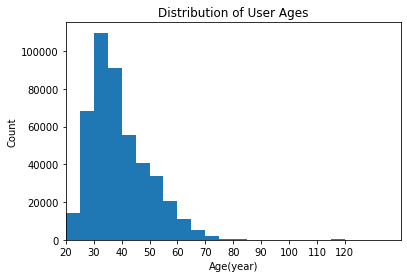

In [10]:
bins = np.arange(0, df['approx_age'].max()+5, 5)
plt.hist(data=df, x='approx_age', bins=bins);
plt.xlim(20, 140)
plt.xticks(np.arange(20, 120+10, 10))
plt.xlabel('Age(year)')
plt.ylabel('Count')
plt.title('Distribution of User Ages');

## Trip Duration vs. User Type

>Customers, in general, took longer trips in comparison to subscribers. We had to apply log transformation to trip duration like before

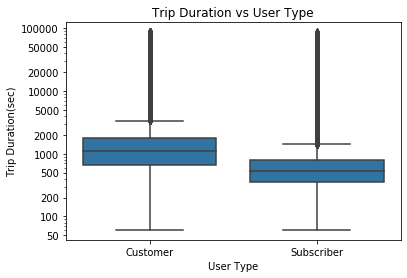

In [12]:
base_color = sb.color_palette()[0]
sb.boxplot(data=df, x='user_type', y='duration_sec', color=base_color)
plt.yscale('log')
y_ticks=[50, 100, 200, 500, 1000, 2000, 5000, 10000, 20000, 50000, 100000]
plt.yticks(y_ticks, y_ticks)
plt.xlabel('User Type')
plt.ylabel('Trip Duration(sec)')
plt.title('Trip Duration vs User Type');

## Trip Duration vs. Gender

>Females in general took longer rides than males and other genders.


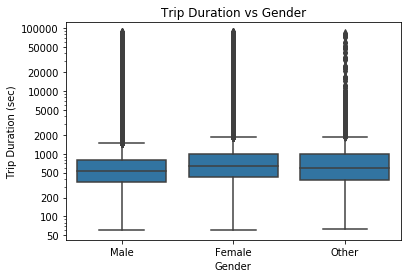

In [13]:
sb.boxplot(data=df, x='member_gender', y='duration_sec', color=base_color)
plt.yscale('log')
y_ticks = [50, 100, 200, 500, 1000, 2000, 5000, 10000, 20000, 50000, 100000]
plt.yticks(y_ticks, y_ticks)
plt.xlabel('Gender')
plt.ylabel('Trip Duration (sec)')
plt.title('Trip Duration vs Gender');

## Trip Duration vs. Age
>Trip duration doesn't follow a uniform trend. Surprisingly, highest average durations are observed for age groups 70-80 years, followed by 20-30 years. 

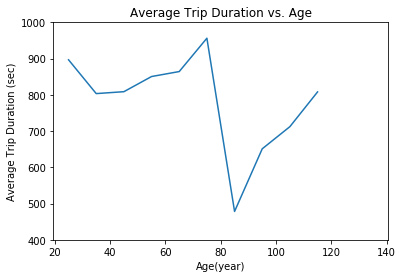

In [15]:
# We'll first have to make the x variable ordered and use cut() to draw a meaningful plot
bin_edges=np.arange(df['approx_age'].min(), df['approx_age'].max() + 10, 10)
bin_centres = bin_edges[:-1] + 5
age_groups = pd.cut(df['approx_age'], bin_edges, include_lowest=True)
mean_durations = df['duration_sec'].groupby(age_groups).mean()
plt.errorbar(x=bin_centres, y=mean_durations);
plt.ylim(400, 1000)
plt.xlabel('Age(year)')
plt.ylabel('Average Trip Duration (sec)')
plt.title('Average Trip Duration vs. Age');


## Trip Duration vs. User Type and Gender
>We observe that customers in general make longer trips than subscribers. However, for customers, females make the longest trips whereas for subscribers, members of the other genders do so. Male subscribers take the shortest trips.

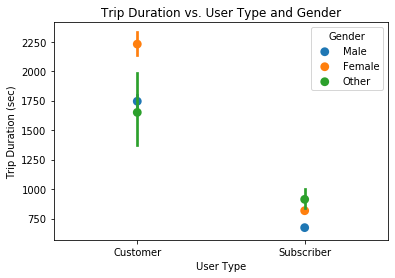

In [17]:
sb.pointplot(data=df, x='user_type', y='duration_sec', hue='member_gender', linestyles='' )
plt.title('Trip Duration vs. User Type and Gender')
plt.xlabel('User Type')
plt.ylabel('Trip Duration (sec)')
plt.legend(title='Gender');

## Trip Duration vs. Start Day and User Type 

>Both customers and subscribers took longer trips on weekends

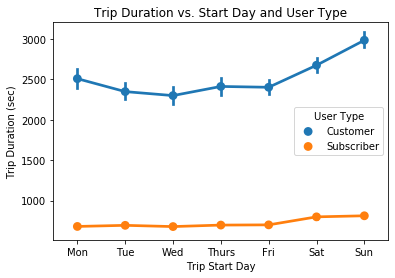

In [19]:
sb.pointplot(data=df, x='start_day', y='duration_sec', hue='user_type')
plt.xlabel('Trip Start Day')
plt.ylabel('Trip Duration (sec)')
plt.title('Trip Duration vs. Start Day and User Type')
plt.legend(title='User Type');

## Trip Duration vs Start Month and Gender
>Longest trips occur during July for all genders. For females and males, there is an almost linear decrease in trip durations after July. Shortest trips for males and females are in December. For other genders, the shortest trips occurred in June. 

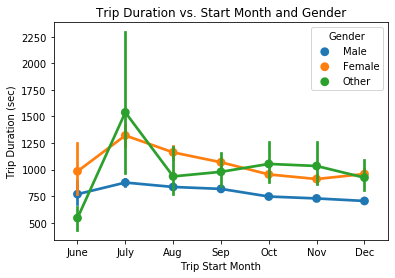

In [20]:
sb.pointplot(data=df, x='start_month', y='duration_sec', hue='member_gender' );
plt.xlabel('Trip Start Month')
plt.ylabel('Trip Duration (sec)')
plt.title('Trip Duration vs. Start Month and Gender')
plt.legend(title='Gender');